In [1]:
import os
train_dir = r'C:\Users\emrek\yapay zeka\homeworks\Project Based Learning Level 2\Become a pro\COVID_19_Classification/train'
validation_dir =r'C:\Users\emrek\yapay zeka\homeworks\Project Based Learning Level 2\Become a pro\COVID_19_Classification/test'
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEMONIA')

In [2]:
train_normal_fnames = os.listdir(train_normal_dir)
print(train_normal_fnames[:10])

train_pneumonia_fnames = os.listdir(train_pneumonia_dir)
train_pneumonia_fnames.sort()
print(train_pneumonia_fnames[:10])

['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0007-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0010-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0011-0001.jpeg']
['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png', '1-s2.0-S1684118220300682-main.pdf-003-b1.png', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', '171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg']


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

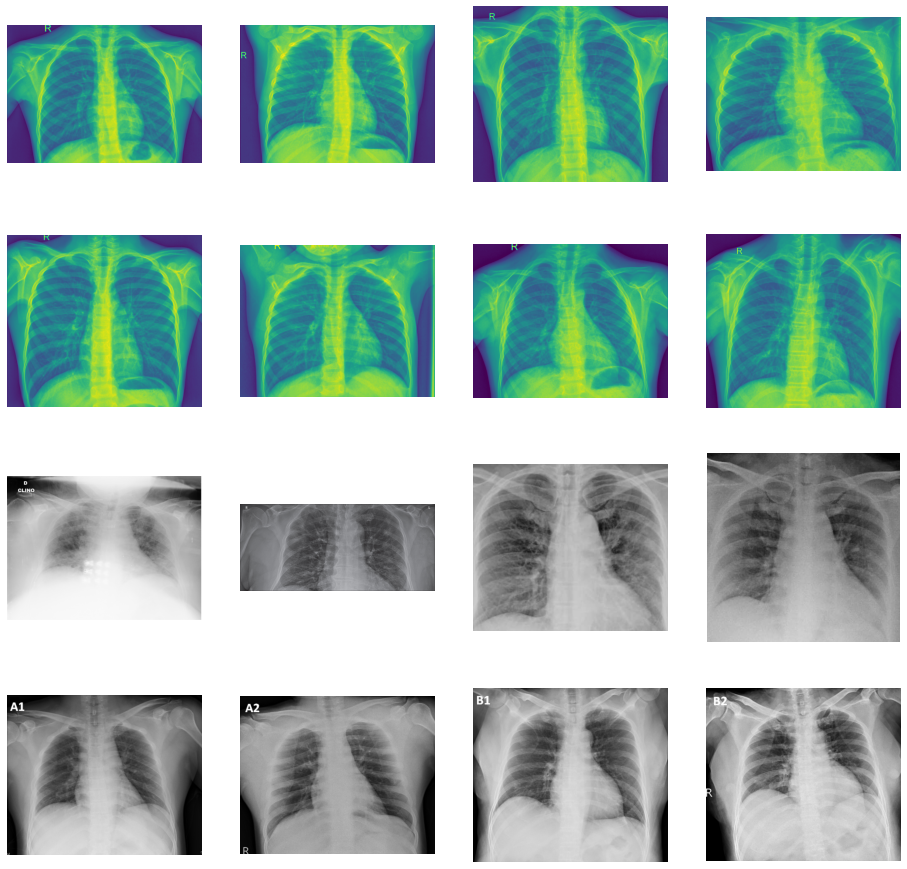

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [7]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [8]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

C:\Users\emrek\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
history=model.fit(train_generator,
epochs = 15,
validation_data = validation_generator
)

Epoch 1/15
8/8 [==============================] - 30s 3s/step - loss: 2.6409 - acc: 0.4459 - val_loss: 0.6613 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 23s 3s/step - loss: 0.6213 - acc: 0.6351 - val_loss: 0.5070 - val_acc: 0.6500
Epoch 3/15
8/8 [==============================] - 19s 2s/step - loss: 0.4046 - acc: 0.8378 - val_loss: 0.0765 - val_acc: 1.0000
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.3854 - acc: 0.9054 - val_loss: 0.1520 - val_acc: 0.9250
Epoch 5/15
8/8 [==============================] - 21s 2s/step - loss: 0.1624 - acc: 0.9324 - val_loss: 0.2173 - val_acc: 0.9000
Epoch 6/15
8/8 [==============================] - 21s 3s/step - loss: 0.1708 - acc: 0.9392 - val_loss: 0.0246 - val_acc: 1.0000
Epoch 7/15
8/8 [==============================] - 20s 2s/step - loss: 0.1579 - acc: 0.9392 - val_loss: 0.0594 - val_acc: 1.0000
Epoch 8/15
8/8 [==============================] - 17s 2s/step - loss: 0.1266 - acc: 0.9662 - val_loss: 0